# Data Visualisation with Python

Data visualisation should produce graphs that are simple, clean and with few distractions, making the information easy to read and follow.

This section will rely heavily on Pandas. For documentation, check: http://pandas.pydata.org/pandas-docs/stable/api.html

## Matplotlib Library

This is a python library that is well-established for data visualisation.

It is formed of 3 layers:
- Backend Layer:
    1. FigureCanvas: refers to the are where the figure will be drawn
    2. Renderer: does the drawing
    3. Event: interprets users inputs like keyboard and mouse clicks
- Artist Layer: Composed of the Artist which knows how to use 'Renderer'
    1. Primitive type: lines, circles, text
    2. Composite type: axis, ticks, figure. May contain other 'composite types' or even 'priitive types'
- Scripting Layer: comprised mainly of 'pyplot' (easier scripting interface)

### Basic Plotting

First, we need to import the library:

In [1]:
import matplotlib as mpl
print("matplotlib version:",mpl.__version__)

matplotlib version: 3.1.3


Note: there are two underscores before and after 'version'.

#### Plot Function

Let's start with importing the scripting interface from inside the library matplotlib:

In [2]:
import matplotlib.pyplot as plt

Now let's make the most basic of plots:

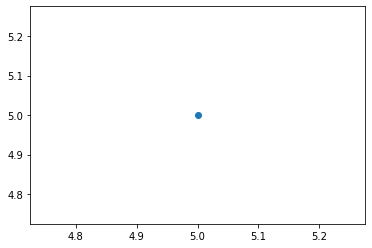

In [5]:
plt.plot(5,5,'o')
plt.show()

When using Jupyter Notebooks, there are a number of ways that we can produce a graph:
- `plt.show()` produces the graph under the input
- `%matplotlib inline` produces the graph as an output which cannot be changed
- `%matplotlib notebook` produces the graph as an output to which we can constantly add new features

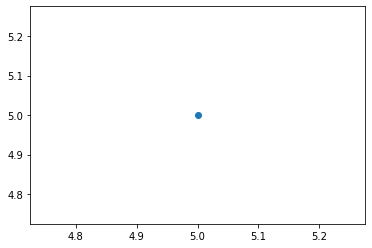

In [7]:
%matplotlib inline
plt.plot(5,5,'o')

In [3]:
%matplotlib notebook
plt.plot(5,5,'o')

<IPython.core.display.Javascript object>

Note: this does not seem to work at the moment on Jupyter Notebooks.

Pandas has an in-built implementation of the matplotlib, so plotting in pandas is as trivial as just calling a plot. Eg. `MyData.plot(kind="line")` or `MyData.plot(kind="hist")`.

The dataset that we will start playing with will be imported from the UN website on immigration to Canada. We will work with a few different python libraries, each of which will be useful for a specific thing.

In [5]:
from __future__ import print_function # adds compatibility to python 2
import numpy as np #useful for scientific computing
import pandas as pd #useful for data structure library

In [12]:
#install xlrd which is a library that is useful for extracting data from excel spreadsheets
!pip install xlrd
print('xlrd installed!')

xlrd installed!


When we open the excel spreadsheet from the website, we see that the top 20 lines of the file are extra information that are not useful for analysis. It is important that we remove these first 20 lines to keep just the action table section of the spreadsheet. Using *pandas*, let's import the table:

In [6]:
df_can=pd.read_excel('~/Documents/Cambridge/Python-Lessons/Canada.xlsx',
                     sheet_name="Canada by Citizenship",
                    skiprows=range(20),
                    skip_footer=2) #last two rows have countries called "unknown" and "total", these were removed

In [7]:
df_can.head() #check if the table is as you wanted.
#you can specify how many rows you would like to see like: 'df_can.head(10)'

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Note: To view the bottom 5 rows:

`df_can.tail()`

Another useful trick is to ask python about basic information on your new dataset:

In [8]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      197 non-null    object
 1   Coverage  197 non-null    object
 2   OdName    197 non-null    object
 3   AREA      197 non-null    int64 
 4   AreaName  197 non-null    object
 5   REG       197 non-null    int64 
 6   RegName   197 non-null    object
 7   DEV       197 non-null    int64 
 8   DevName   197 non-null    object
 9   1980      197 non-null    int64 
 10  1981      197 non-null    int64 
 11  1982      197 non-null    int64 
 12  1983      197 non-null    int64 
 13  1984      197 non-null    int64 
 14  1985      197 non-null    int64 
 15  1986      197 non-null    int64 
 16  1987      197 non-null    int64 
 17  1988      197 non-null    int64 
 18  1989      197 non-null    int64 
 19  1990      197 non-null    int64 
 20  1991      197 non-null    int64 
 21  1992      197 no

Don't forget that you can also investigate the column names and the indicies:

In [10]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [11]:
df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Not all the columns in our data will be useful for us. We can get rid of a few columns using `drop()`:

In [12]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)
#axis=0 represents rows, and axis=1 refers to columns

df_can.head(2) #check command worked

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


It is often useful to be able to rename some columns, we can do that with the command `rename()`:

In [13]:
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Other useful checks to do of your dataset are to see how many null objects are present in each row:

In [14]:
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
dtype: int64

And look at a quick summary of the dataset:

In [15]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.00000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,1453.167513,1306.000000,1230.203046,905.431472,896.162437,856.304569,1008.639594,1543.908629,1640.456853,1944.670051,...,2394.131980,2662.35533,2554.720812,2403.583756,2510.091371,2560.101523,2849.614213,2525.360406,2618.304569,2629.654822
std,10784.524807,9449.373841,8864.905615,6503.149859,6452.570413,6155.858422,7205.630681,11045.558746,11809.252241,13939.908653,...,17119.626937,19104.65330,18261.461660,17129.490442,17908.071420,18276.881231,20386.174875,18082.496369,18763.159434,18838.224387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,21.000000,29.00000,26.000000,32.000000,32.000000,37.000000,42.000000,38.000000,43.000000,45.000000
50%,14.000000,10.000000,12.000000,12.000000,14.000000,17.000000,21.000000,33.000000,36.000000,45.000000,...,196.000000,211.00000,230.000000,198.000000,205.000000,217.000000,216.000000,196.000000,235.000000,217.000000
75%,266.000000,299.000000,299.000000,197.000000,207.000000,202.000000,257.000000,467.000000,476.000000,538.000000,...,866.000000,857.00000,856.000000,975.000000,975.000000,917.000000,953.000000,851.000000,799.000000,852.000000
max,143137.000000,128641.000000,121175.000000,89185.000000,88272.000000,84346.000000,99351.000000,152075.000000,161585.000000,191550.000000,...,235822.000000,262242.00000,251640.000000,236753.000000,247244.000000,252170.000000,280687.000000,248748.000000,257903.000000,259021.000000


Sometimes we only want to work with a few or only one column, to select specific columns, try:

In [17]:
df_can.Country #gives us a series of what is in this column

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
192             Yemen
193            Zambia
194          Zimbabwe
195           Unknown
196             Total
Name: Country, Length: 197, dtype: object

This method might only work if the column nme has no spaces or special characters. If that is the case, then try instead: `df_can['Country Options']`.

For selecting a few different columns:

In [19]:
df_can[['Country',1980,1990]] #using two square bracket indicates that you are selecting only columns

,Country,1980,1990
0,Afghanistan,16,1028
1,Albania,1,3
2,Algeria,80,491
3,American Samoa,0,2
4,Andorra,0,3
...,...,...,...
192,Yemen,1,4
193,Zambia,11,77
194,Zimbabwe,72,129
195,Unknown,44000,28397


#### Line plots

Series of data points that are connected by straight line segments.

To make a line plot we will need:
- library to plot: matplotlib
- scripting interface: pyplot
- clean/organised data

In [22]:
import matplotlib as mpl # library to plot
import matplotlib.pyplot as plt #scripting interface

In [27]:
df_canada=pd.DataFrame(df_can)

In [28]:
#set name of rows to the country names
df_canada_indexed=df_canada.set_index('Country') #side note: the opposite of set is reset: reset_index()
df_canada_indexed.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In order to make the data frame look cleaner, we can also remove the index name, in this case 'Country':

In [30]:
df_canada_indexed.index.name=None
df_canada_indexed.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [38]:
#create a new column with total immigration per country (row).

#sets name of new column, selects which columns to be aggregated using 'iloc', used method 'sum', 
#and specifies that this will appear at end of columns list
df_canada_indexed['Total']=df_canada_indexed.iloc[:,8:43].sum(axis=1) 
df_canada_indexed.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58427
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69089
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


This method is useful to know if you have a data frame full of numbers and you only want to sum a few of those columns. But since our data frame only has numbers or strings, and the data in the strings is not important, the sum will only add the data for the numbers. This can be done also like this:

`df_canada_indexed['Total']=df_canada_indexed.sum(axis=1)`

We want to make the values that will be put on the x-axis, which is the years, into strings instead of numbers, for this we will transform the 

In [39]:
years=list(range(1980,2014)) # transforming years in a specific range into strings

years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

Remember that to select specific rows, we need to use `loc[]`:

In [40]:
print(df_canada_indexed.loc['Albania'])

Continent               Europe
Region         Southern Europe
DevName      Developed regions
1980                         1
1981                         0
1982                         0
1983                         0
1984                         0
1985                         0
1986                         1
1987                         2
1988                         2
1989                         3
1990                         3
1991                        21
1992                        56
1993                        96
1994                        71
1995                        63
1996                       113
1997                       307
1998                       574
1999                      1264
2000                      1816
2001                      1602
2002                      1021
2003                       853
2004                      1450
2005                      1223
2006                       856
2007                       702
2008                       560
2009    

In [33]:
#Another way:
print(df_canada_indexed.iloc[1])

Continent               Europe
Region         Southern Europe
DevName      Developed regions
1980                         1
1981                         0
1982                         0
1983                         0
1984                         0
1985                         0
1986                         1
1987                         2
1988                         2
1989                         3
1990                         3
1991                        21
1992                        56
1993                        96
1994                        71
1995                        63
1996                       113
1997                       307
1998                       574
1999                      1264
2000                      1816
2001                      1602
2002                      1021
2003                       853
2004                      1450
2005                      1223
2006                       856
2007                       702
2008                       560
2009    

In [37]:
# Recap: a way to select an element using column and row
print(df_canada_indexed.loc['Japan',2013])

982


In [36]:
#to select many columns using the same row
print(df_canada_indexed.loc['Japan',[1980,1981,1982,1983]]) #similar can be done with indexes and using iloc

1980    701
1981    756
1982    598
1983    309
Name: Japan, dtype: object


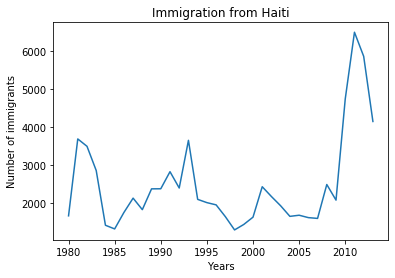

In [41]:
%matplotlib inline
df_canada_indexed.loc['Haiti',years].plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
           
plt.show()

Other useful tricks to know in pandas involve *conditions*. We can set conditions to narrow down your data frame to work with, for example:

In [43]:
condition=df_canada_indexed['Continent']=='Asia' #creating condition with boolean data
print(condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Yemen              True
Zambia            False
Zimbabwe          False
Unknown           False
Total             False
Name: Continent, Length: 197, dtype: bool


In [45]:
df_canada_indexed[condition] #narrowing down the data to use according to the condition

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58427
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,470
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65136
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5875
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,503
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6438
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,641459
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


You can also set multiple conditions:

In [46]:
df_canada_indexed[(df_canada_indexed['Continent']=='Asia') & (df_canada_indexed['Region']=='Southern Asia')]
#in python & refers to 'and', and '|' refers to 'or', and the conditions must be enclosed in circular parentheses

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58427
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65136
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5875
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,653165
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,167931
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,29
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10211
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,236881
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,146229
